In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time

## 1. NumPy Operations

In [7]:
# Create two large arrays
size = 10_000_000
arr1 = np.random.rand(size)
arr2 = np.random.rand(size)

# --- Vectorized execution ---
start_vec = time.time()
result_vec = arr1 + arr2  # Elementwise addition
end_vec = time.time()
vec_time = end_vec - start_vec

# --- Loop execution ---
start_loop = time.time()
result_loop = np.empty(size)
for i in range(size):
    result_loop[i] = arr1[i] + arr2[i]
end_loop = time.time()
loop_time = end_loop - start_loop

# ## Vectorization vs Loops: Verify both methods produce the same result
print("Results are identical:", np.allclose(result_vec, result_loop))
print(f"Vectorized execution time: {vec_time:.3f} seconds")
print(f"Loop execution time: {loop_time:.3f} seconds")


Results are identical: True
Vectorized execution time: 0.010 seconds
Loop execution time: 1.255 seconds


## 2. Dataset Loading

In [10]:
df = pd.read_csv('../data/starter_data.csv')
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  10 non-null     object
 1   value     10 non-null     int64 
 2   date      10 non-null     object
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


(  category  value        date
 0        A     10  2025-08-01
 1        B     15  2025-08-02
 2        A     12  2025-08-03
 3        B     18  2025-08-04
 4        C     25  2025-08-05,
 None)

## 3. Summary Statistics

In [11]:
df.describe()

,value
count,10.000000
mean,17.600000
std,7.381659
min,10.000000
25%,12.250000
50%,14.500000
75%,23.250000
max,30.000000


In [17]:
# Numeric columns stats
numeric_stats = df.select_dtypes(include=np.number).describe()
print("Numeric Statistics:")
display(numeric_stats)

Numeric Statistics:


,value
count,10.000000
mean,17.600000
std,7.381659
min,10.000000
25%,12.250000
50%,14.500000
75%,23.250000
max,30.000000


## 4. Save Outputs

In [14]:
summary = df.groupby('category').mean(numeric_only=True).reset_index()
summary.to_csv('../data/processed/summary.csv', index=False)
summary

,category,value
0,A,11.500000
1,B,15.666667
2,C,27.666667


## Bonus: Plotting

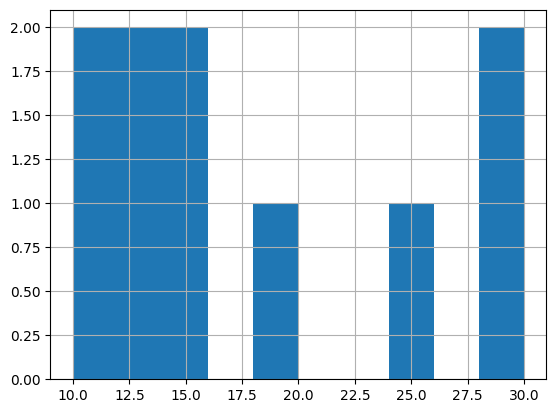

In [16]:
df['value'].hist()
plt.savefig('../data/processed/histogram.png')

## Bonus: Reusable Function

In [18]:
def analyze_numeric(df, group_col=None):
    """
    Generate enhanced statistics for numeric columns.
    
    Args:
        df: pandas DataFrame
        group_col: Column name for grouping (optional)
    
    Returns:
        DataFrame with statistics
    """
    numeric_df = df.select_dtypes(include=np.number)
    
    if group_col and group_col in df.columns:
        return numeric_df.groupby(df[group_col]).describe()
    return numeric_df.describe()

# Test the function
print("\nCustom Analysis:")
display(analyze_numeric(df, 'category' if 'category' in df.columns else None))


Custom Analysis:


value                                                     
         count       mean       std   min    25%   50%    75%   max
category                                                           
A          4.0  11.500000  1.290994  10.0  10.75  11.5  12.25  13.0
B          3.0  15.666667  2.081666  14.0  14.50  15.0  16.50  18.0
C          3.0  27.666667  2.516611  25.0  26.50  28.0  29.00  30.0

## Bonus: Move Function to utils.py

In [21]:
import os
import sys

# Direct path to src folder
src_path = os.path.abspath(os.path.join(os.getcwd(), "../src"))
sys.path.insert(0, src_path)
# This function is also saved in src/utils.py
from utils import analyze_numeric as external_analyze

print("\nImported Function Test:")
display(external_analyze(df))


Imported Function Test:


,value
count,10.000000
mean,17.600000
std,7.381659
min,10.000000
25%,12.250000
50%,14.500000
75%,23.250000
max,30.000000
range,20.000000
